<a href="https://colab.research.google.com/github/tsawsum/Axis-and-Allies/blob/master/ML_HW3_Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project HW 3 Part 1 Problem 3

## 1. Create a training dataset using  a third order polynomial  y=p(x) for x  taking randomly  from some interval [a,b] of your choice (add some small noise to your dataset)



In [44]:
# Ignore warnings that aren't helpful. Rylie walked me through this

import warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.linalg.decomp_lu import LinAlgWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="Singular matrix in solving dual problem. Using least-squares solution instead.")
warnings.filterwarnings("ignore", category=LinAlgWarning, message="^Ill-conditioned matrix.*")

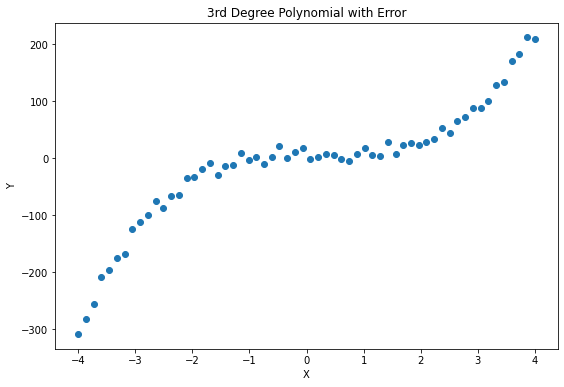

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Generate third order polynomial points
# range [-4, 4], 60 points
pts = 60
x = np.linspace(-4, 4, pts)
X = np.array(x).reshape(-1,1)

# Generate a uniform error
# 60 points
e = np.random.randint(0, 30, size=pts)
ne = np.array(e).reshape(-1,1)

# Generate dependent variable (3rd degree polynomial)
Y = 4*(X**3) - 3*(X**2) + X - 6 + ne

# Plot
plt.figure(figsize = (9,6))
plt.scatter(X,Y)

# Label plot
plt.title('3rd Degree Polynomial with Error')
plt.xlabel('X')
plt.ylabel('Y')

# Show
plt.show()

In [46]:
from sklearn.model_selection import ShuffleSplit

# Shuffle X and Y
index = np.linspace(0, len(X)-1, len(X), dtype=int)
split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

TRAIN: [31  3 52 17  8  6 40  4 43 19 34 58 25 56 15 27  9 30 26 16 24 55 11 32
 53 41 37 29 44  1 21  2 47 39 35 23 49 10 22 18 59 20  7 42 14 28 51 38] TEST: [ 0  5 36 45 13 54 33 48 12 57 46 50]
TRAIN: [10 21 50 11 19 56 59  0 26 44  8 37 24 42 23 32 36 58 12 15 20 22 38 57
 14 30 54 52  9 33 25 17 28 51 41  5  1  3 39 49 35 16 13 34 46  7 43  6] TEST: [18 45 47 48  4 40 27 29 31 55 53  2]
TRAIN: [50 15 44 28 10 29 52 24 35  3 19 16 57 18 12  9 59 30 14 56 46 38 25  4
 41  2 13 48 42  0 51 26 21 39 43 34 36 23 22 47 32 33 11  7  8  6 27 40] TEST: [17 54 55 53 45 58 20 31  1  5 37 49]
TRAIN: [57  9 44 56 20 18 49 41 21 34 52 25 33 53  4 16 45  1  6 55 11 37 35 31
 14 23 50 36  8 48  7  5 51  2 40 12 26  0 32 38 24 59 10 29 19 58 43 27] TEST: [13 46 22 54 15 47 17 28 42 39  3 30]
TRAIN: [54 34 48 23 37  4 11 33 36  1 16 43 26 46 52 41 45  9 29 30 22 24 27 58
  0 17 38 55 40  6 31 49 57 50 25 18 35 19  2 28 56  5  8 32 15 47 10 21] TEST: [39 59 13 44  7 20 53  3 42 14 51 12]


## 2. Run polynomial regression for a second order polynomial model.  Plot learning curves : training error and cross validation error (changing size of training data, not using any regularization)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 38 instead of 40.
  warnings.warn(


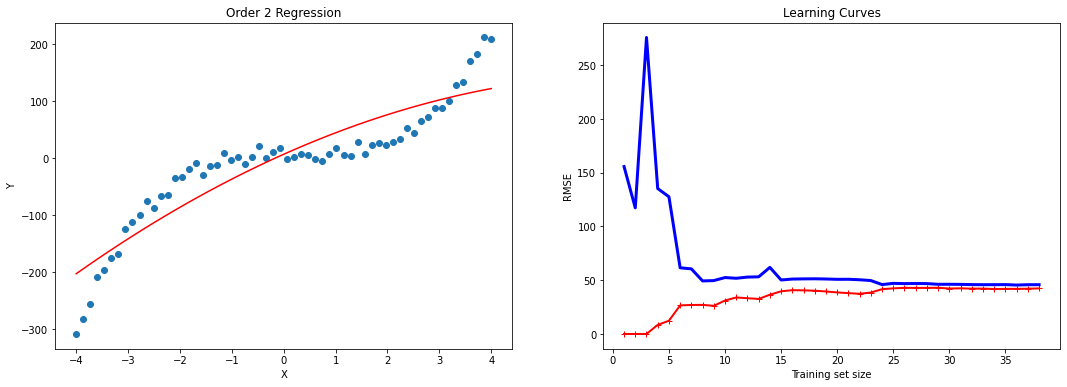

In [47]:
from numpy.random.mtrand import RandomState
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Make Polynomial Array. abc and datapoint array
X_poly_degree2 = PolynomialFeatures(2)
data_degree2 = X_poly_degree2.fit_transform(X)

# Select The Model: Linear regression of sorts, and Train by fitting to data
model2 = LinearRegression()
model2.fit(data_degree2, Y)

# Make data2 from Shuffled Data
data2_train = X_poly_degree2.fit_transform(X_train)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data2_train, Y_train, train_sizes = np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model2.predict(data_degree2), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

# Label plots
axs[0].set_title('Order 2 Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')
# axs[1].set_ylim(-1,7)

#Show
plt.show()

## 3. Run polynomial regression for a 6-th order polynomial model.  Plot learning curves : training error and cross validation error   (changing size of training data, not using any regularization )

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 38 instead of 40.
  warnings.warn(


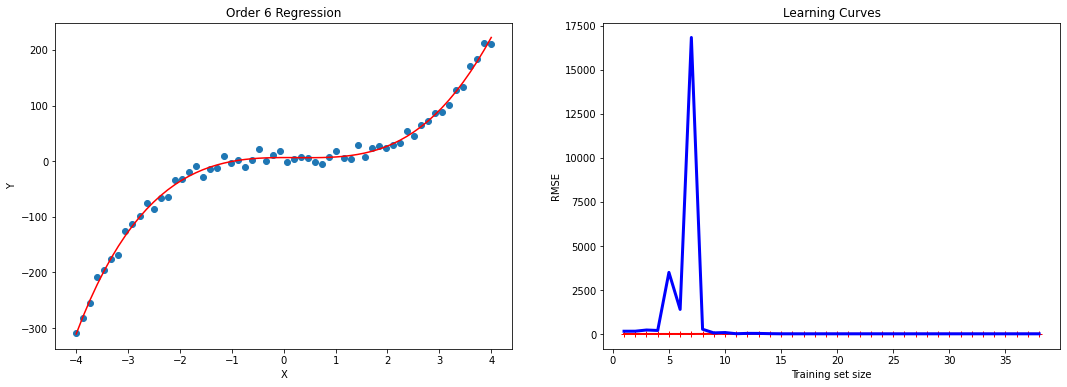

In [48]:
from numpy.random.mtrand import RandomState
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Make Polynomial Array. abc and datapoint array
X_poly_degree6 = PolynomialFeatures(6)
data_degree6 = X_poly_degree6.fit_transform(X)

# Select The Model: Linear regression of sorts, and Train by fitting to data
model6 = LinearRegression()
model6.fit(data_degree6, Y)

# Make data6 from Shuffled Data
data6_train = X_poly_degree6.fit_transform(X_train)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data6_train, Y_train, train_sizes = np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model6.predict(data_degree6), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

# Label plots
axs[0].set_title('Order 6 Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')
# axs[1].set_ylim(-1,7)

#Show
plt.show()

## 4. Introduce L1 regularization.  Plot cross validation error vs regularizing parameter lambda, find the best value of lambda.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 38 instead of 40.
  warnings.warn(


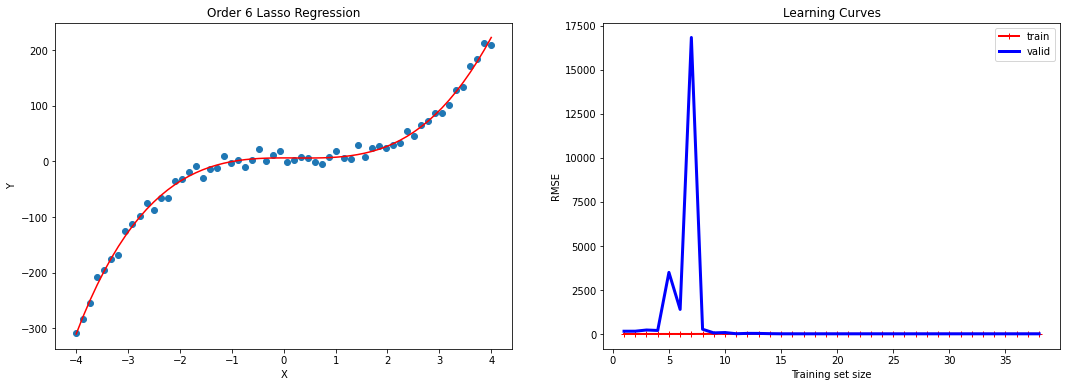

[[ 0.          0.11957788 -3.03022663  3.86158372  0.09343545  0.01838484
  -0.00635606]]
[ 0.          0.         -2.71696815  3.88475552  0.0428985   0.01735784
 -0.00427018]


In [49]:
from sklearn.linear_model import Lasso

# Select The Model and Train
model6_lasso = Lasso(alpha=0.1) #Lasso gives l1 reg with lamda =alpha
model6_lasso.fit(data_degree6, Y)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data6_train, Y_train, train_sizes = np.linspace(0.01, 1.0, 40), cv=5, 
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model6_lasso.predict(data_degree6), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
# axs[1].set_ylim(0, 20)

# Label plots
axs[0].set_title('Order 6 Lasso Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')
axs[1].legend()

#Show
plt.show()

# Print Coefficients of Regularized and Non-Regularized Models
print(model6.coef_)
print(model6_lasso.coef_)

### Find the Best Value of Lambda

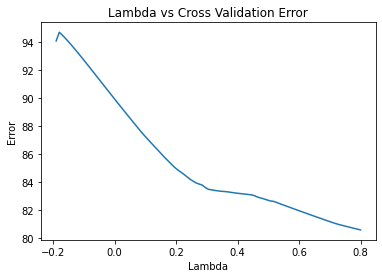

In [50]:
from sklearn.model_selection import cross_val_score

# Lambda Values
lamda = np.linspace(-0.2, 0.8, 100)[1:]

# Cross Val Errors
lasso_mse = []
for alpha in lamda:
    model6_lasso.set_params(alpha=alpha)
    mse = np.mean(cross_val_score(model6_lasso, data6_train, Y_train, cv=5, scoring='neg_mean_squared_error'))
    lasso_mse.append(-mse)

# Plot
plt.plot(lamda, lasso_mse)

# Label plot
plt.title('Lambda vs Cross Validation Error')
plt.xlabel('Lambda')
plt.ylabel('Error')

#Show
plt.show()

The first time I ran this the best value for lambda is -0.15. Why did lamda seem to want to go negative???

### Now the best value is 0.58

## 5. For the best value of lambda run polynomial regression for 10th order polynomial model. Comment on your result.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 38 instead of 40.
  warnings.warn(


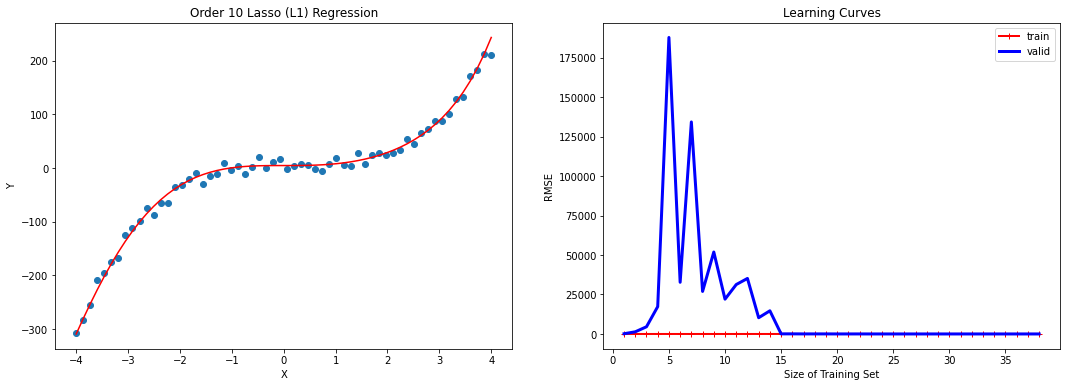

[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.71678627e+00
 -4.58946410e-01  2.79093990e-02  1.29423562e-02  9.60268716e-04
  4.50558249e-04 -2.18962168e-05 -2.53447503e-06]


In [51]:
# Make Polynomial Array
X_poly_degree10 = PolynomialFeatures(10)
data10 = X_poly_degree10.fit_transform(X)

# Make data10 from Shuffled Data
data10 = X_poly_degree10.fit_transform(X_train)
data10_unshuffled = X_poly_degree10.fit_transform(X)

# Select The Model and Train
model10_lasso = Lasso(alpha=0.58)
model10_lasso.fit(data10, Y_train)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data10, Y_train, train_sizes = np.linspace(0.01, 1.0, 40), cv=5, 
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model10_lasso.predict(data10_unshuffled), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

# Label plots
axs[0].set_title('Order 10 Lasso (L1) Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Size of Training Set')
axs[1].set_ylabel('RMSE')
axs[1].legend()

#Show
plt.show()

# Print Coefficients
print(model10_lasso.coef_)

## 6. Repeat 4,5 for L2 regularization.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 38 instead of 40.
  warnings.warn(


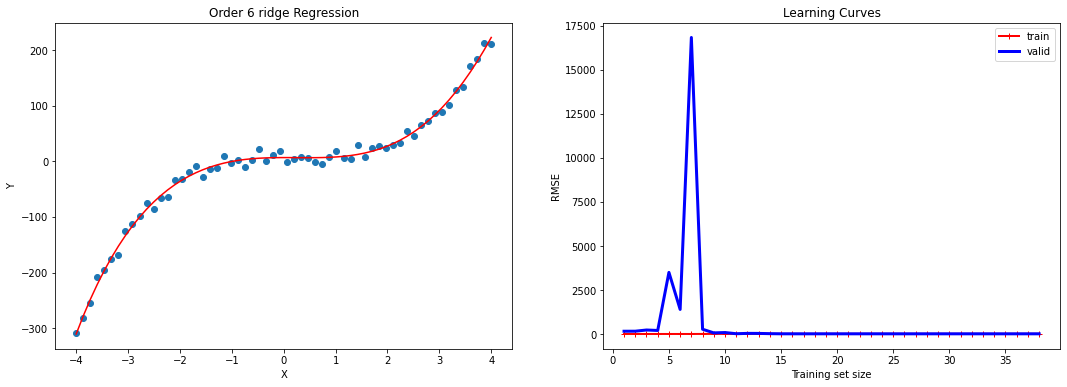

[[ 0.          0.11957788 -3.03022663  3.86158372  0.09343545  0.01838484
  -0.00635606]]
[[ 0.          0.1237557  -3.01720063  3.86046892  0.09136457  0.01844328
  -0.00627137]]


In [52]:
from sklearn.linear_model import Ridge

# Select The Model and Train
model6_ridge = Ridge(alpha=0.1) #Ridge gives l1 reg with lamda =alpha
model6_ridge.fit(data_degree6, Y)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data6_train, Y_train, train_sizes = np.linspace(0.01, 1.0, 40), cv=5, 
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model6_ridge.predict(data_degree6), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
# axs[1].set_ylim(0, 20)

# Label plots
axs[0].set_title('Order 6 ridge Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')
axs[1].legend()

#Show
plt.show()

# Print Coefficients of Regularized and Non-Regularized Models
print(model6.coef_)
print(model6_ridge.coef_)

### Finding Best Value of Lambda (why is it 5.8????)

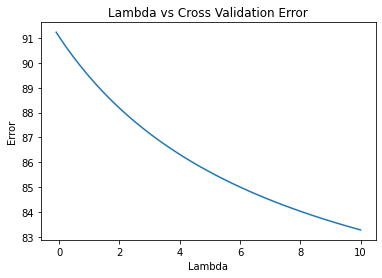

In [53]:
from sklearn.model_selection import cross_val_score

# Lambda Values
lamda = np.linspace(-0.2, 10, 100)[1:]

# Cross Val Errors
ridge_mse = []
for alpha in lamda:
    model6_ridge.set_params(alpha=alpha)
    mse = np.mean(cross_val_score(model6_ridge, data6_train, Y_train, cv=5, scoring='neg_mean_squared_error'))
    ridge_mse.append(-mse)

# Plot
plt.plot(lamda, ridge_mse)

# Label plot
plt.title('Lambda vs Cross Validation Error')
plt.xlabel('Lambda')
plt.ylabel('Error')

#Show
plt.show()

### Run 10th degree regression for best lambda value

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 38 instead of 40.
  warnings.warn(


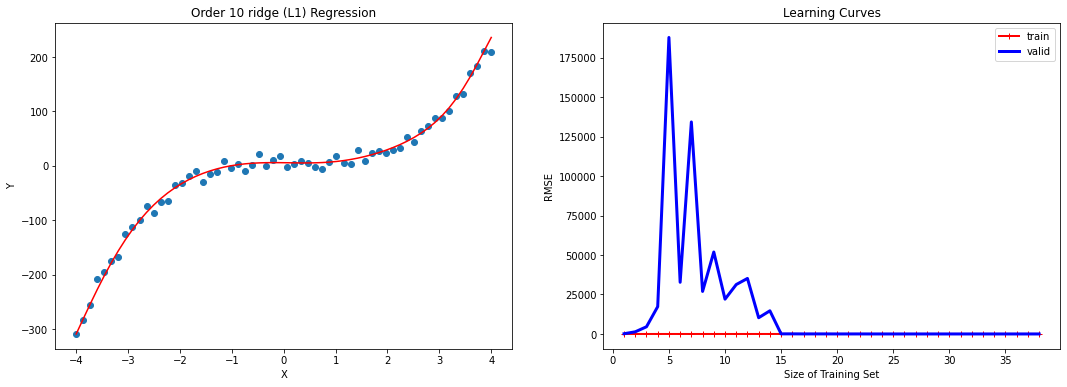

[[ 0.00000000e+00 -1.28749463e+00 -1.66127625e+00  5.37188651e+00
   1.21622722e-01 -4.00576993e-01 -7.96908615e-02  3.98938540e-02
   7.34755432e-03 -1.18132842e-03 -1.92602924e-04]]


In [54]:
# Make Polynomial Array
X_poly_degree10 = PolynomialFeatures(10)
data10 = X_poly_degree10.fit_transform(X)

# Make data10 from Shuffled Data
data10 = X_poly_degree10.fit_transform(X_train)
data10_unshuffled = X_poly_degree10.fit_transform(X)

# Select The Model and Train
model10_ridge = Ridge(alpha=0.58)
model10_ridge.fit(data10, Y_train)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data10, Y_train, train_sizes = np.linspace(0.01, 1.0, 40), cv=5, 
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model10_ridge.predict(data10_unshuffled), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

# Label plots
axs[0].set_title('Order 10 ridge (L1) Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Size of Training Set')
axs[1].set_ylabel('RMSE')
axs[1].legend()

#Show
plt.show()

# Print Coefficients
print(model10_ridge.coef_)

## 7. From your training set select 10 random points, plot these points vs minimal L2 norm interpolating polynomials of the order:  9, 15, 20, 30 (use different colors ).  Comment on the result.

### I assumed that in this problem you wanted the polynomials to be trained on the 10 random points, so that's what I did. With a few tweaks, the polynomials could be trained on the whole data set and compared to the 10 random points.

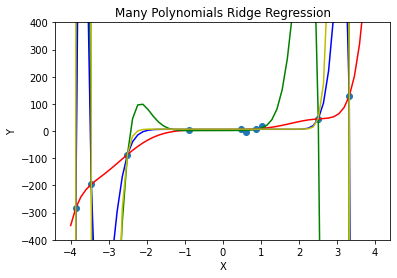

In [55]:
# Select 10 points
X_10points = X_train[:10]
Y_10points = Y_train[:10]

# Make Polynomial Arrays for Fitting
X_poly9 = PolynomialFeatures(9)
X_poly15 = PolynomialFeatures(15)
X_poly20 = PolynomialFeatures(20)
X_poly30 = PolynomialFeatures(30)
data9 = X_poly9.fit_transform(X_10points)
data15 = X_poly15.fit_transform(X_10points)
data20 = X_poly20.fit_transform(X_10points)
data30 = X_poly30.fit_transform(X_10points)

# Make Polynomial Arrays for Plotting
data9_plot = X_poly9.fit_transform(X)
data15_plot = X_poly15.fit_transform(X)
data20_plot = X_poly20.fit_transform(X)
data30_plot = X_poly30.fit_transform(X)

# Select and Train the Models
model9_ridge = Ridge(alpha=5.8)
model9_ridge.fit(data9, Y_10points)
model15_ridge = Ridge(alpha=5.8)
model15_ridge.fit(data15, Y_10points)
model20_ridge = Ridge(alpha=5.8)
model20_ridge.fit(data20, Y_10points)
model30_ridge = Ridge(alpha=5.8)
model30_ridge.fit(data30, Y_10points)

# Plot
plt.scatter(X_10points, Y_10points)
plt.plot(X, model9_ridge.predict(data9_plot), 'r')
plt.plot(X, model15_ridge.predict(data15_plot), 'g')
plt.plot(X, model20_ridge.predict(data20_plot), 'b')
plt.plot(X, model30_ridge.predict(data30_plot), 'y')

# Label plot
plt.title('Many Polynomials Ridge Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-400,400)

#Show
plt.show()

### Red is decent and green blue and yellow become super crazy. The more overfit the model is, the worse it appears to represent the actual data

##  8. Use as a training set just 20 random points, Plot cross validation error vs the order of a polynomial model starting from order 2 and going to order 40.

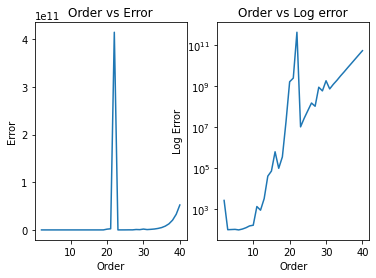

In [63]:
# Make set of polynomial orders
polynomial_orders = np.linspace(2, 40, 39, dtype='int')

# 20 random points
X_20points = X_train[:20]
Y_20points = Y_train[:20]

# Cross Validation Errors
ridge_rmses = []
for order in polynomial_orders:
    X_poly = PolynomialFeatures(order)
    data = X_poly.fit_transform(X_20points)
    data_val = X_poly.fit_transform(X_train[20:])
    model_ridge = Ridge(alpha=5.8)
    model_ridge.fit(data, Y_20points)
    mse = np.mean(cross_val_score(model_ridge, data_val, Y_train[20:], cv=5, scoring='neg_mean_squared_error'))
    ridge_rmses.append(-mse)

# Plot
ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)
ax0.plot(polynomial_orders, ridge_rmses)
ax1.plot(polynomial_orders, ridge_rmses)
ax1.set_yscale('log')

# Label plot
ax0.set_title('Order vs Error')
ax0.set_xlabel('Order')
ax0.set_ylabel('Error')
ax1.set_title('Order vs Log error')
ax1.set_xlabel('Order')
ax1.set_ylabel('Log Error')
# plt.ylim(0,25)

#Show
plt.show()

### This is pretty cool